# Imports

In [10]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt
import os

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [11]:
n = 8 # 5 increase n 
label_name = "stat9"
layers = [2] #[7, 2]

epochs = 1000 # increase epochs until curve flattens
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [12]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [13]:
os.makedirs('models', exist_ok=True)
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 299.53613659739494
Epoch 1, Loss 239.77939301729202
Epoch 2, Loss 212.29958455264568
Epoch 3, Loss 198.6072538793087
Epoch 4, Loss 189.19697239995003
Epoch 5, Loss 183.91014602780342
Epoch 6, Loss 178.85278321802616
Epoch 7, Loss 176.49862962961197
Epoch 8, Loss 173.56199929118156
Epoch 9, Loss 171.91160033643246
Epoch 10, Loss 171.21865275502205
Epoch 11, Loss 170.036622017622
Epoch 12, Loss 168.78214225172997
Epoch 13, Loss 166.94659000635147
Epoch 14, Loss 164.74031347036362
Epoch 15, Loss 165.62590934336185
Epoch 16, Loss 164.4505097270012
Epoch 17, Loss 163.51061630249023
Epoch 18, Loss 164.52046199142933
Epoch 19, Loss 163.397381298244
Epoch 20, Loss 163.41901057958603
Epoch 21, Loss 163.53788658231497
Epoch 22, Loss 161.87260694801807
Epoch 23, Loss 160.09339982271194
Epoch 24, Loss 162.01508916914463
Epoch 25, Loss 163.59792301803827
Epoch 26, Loss 162.19734647870064
Epoch 27, Loss 159.78255010396242
Epoch 28, Loss 161.27926792949438
Epoch 29, Loss 163.36141583323

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

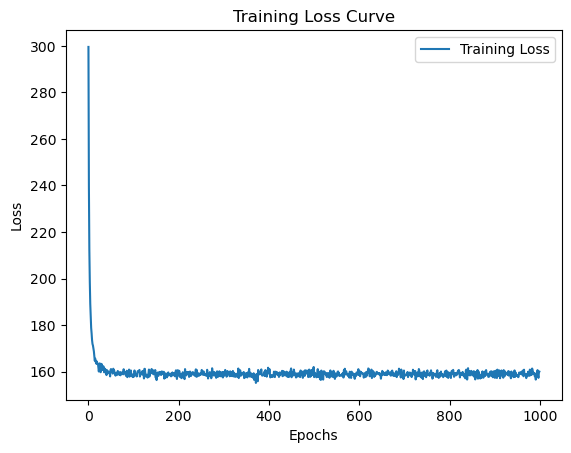

In [14]:
# Create directory for saving figures if it doesn't exist
os.makedirs('figures', exist_ok=True)
# Plot and save the loss curve
plt.figure()
plt.plot(range(epochs), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.savefig(f'figures/{label_name}_loss_curve.png')
plt.show()

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

[[26648, 4467], [146, 995]]
Accuracy for class 0 = 85.64358026675237%
Accuracy for class 1 = 87.20420683610868%
Overall accuracy = 85.69878472222223%


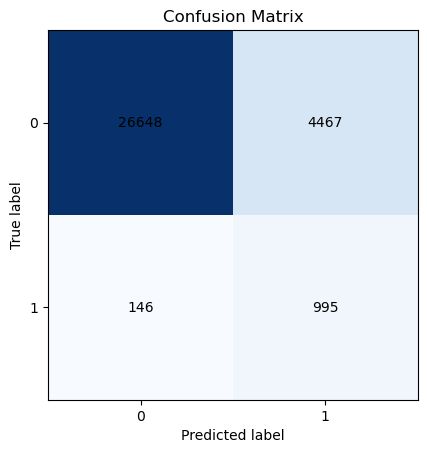

In [15]:
confusion_matrix = evaluate_model(model, training_dataset)
print(confusion_matrix)
confusion_matrix.print_accuracy()
confusion_matrix.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

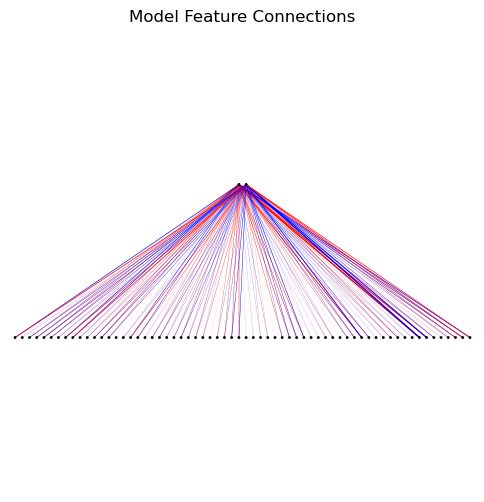

In [16]:
model.plot_connections()

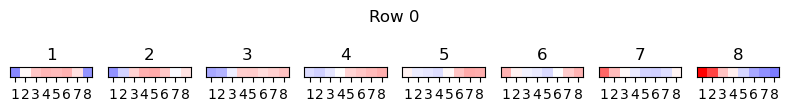

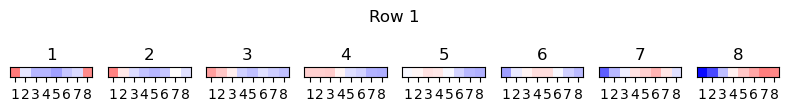

In [17]:
model.plot_heatmap_feature(0,0)
model.plot_heatmap_feature(0,1)

In [18]:
#model.plot_heatmap_feature(1,0)
#model.plot_heatmap_feature(1,1)

#model.plot_heatmap_feature(0,4)

In [20]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = f"data/permutations_{n}.csv"  # Update the path accordingly
data = pd.read_csv(file_path)

# Convert the permutation strings to actual tuples of integers
data['permutation_tuple'] = data['permutation'].apply(lambda x: tuple(map(int, x.strip("()").split(", "))))

def count_inversions(perm):
    """ Count the number of inversions in the permutation """
    inv_count = 0
    for i in range(len(perm)):
        for j in range(i + 1, len(perm)):
            if perm[i] > perm[j]:
                inv_count += 1
    return inv_count

# Calculate the number of inversions for each permutation
data['inversions'] = data['permutation_tuple'].apply(count_inversions)

# Try different thresholds to find the optimal one
thresholds = range(data['inversions'].min(), data['inversions'].max() + 1)
best_threshold = 0
best_accuracy = 0

for threshold in thresholds:
    # Predict stat9 based on the threshold
    data['predicted_stat9'] = data['inversions'].apply(lambda x: 1 if x < threshold else 0)
    
    # Calculate accuracy
    accuracy = accuracy_score(data['stat9'], data['predicted_stat9'])
    
    # Update the best threshold if current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

# Display the best threshold and its accuracy
best_threshold, best_accuracy

(4, 0.9652529761904762)